# Louvain method results
### Results of the Lovain method comparing parallel runtimes vs sequential runtimes for different graph sizes.

Author: Benedikt Farag, benedikt.farag@yale.edu
April 18th 2025
New Haven, CT

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import re

# Set plot style
sns.set(style="whitegrid")

In [ ]:
# Load all summary files
seq_file = "louvain_summary0.txt"
par_files = sorted(glob.glob("louvain_summary_par*.txt"))

# Read sequential file
df_seq = pd.read_csv(seq_file, sep="\t", comment="#")
df_seq["Type"] = "Sequential"

# Read and combine parallel files
dfs_par = []
for f in par_files:
    df = pd.read_csv(f, sep="\t", comment="#")
    df["Type"] = os.path.basename(f).replace(".txt", "")
    dfs_par.append(df)

df_all = pd.concat([df_seq] + dfs_par, ignore_index=True)


In [ ]:
# Compute speedups by merging with sequential runtimes
df_speedup = pd.merge(
    pd.concat(dfs_par, ignore_index=True),
    df_seq[["Graph Name", "Runtime (s)"]],
    on="Graph Name",
    suffixes=("", "_seq")
)

df_speedup["Speedup"] = df_speedup["Runtime (s)_seq"] / df_speedup["Runtime (s)"]

# Extract node count from Graph Name for legend
def extract_nodes(name):
    match = re.search(r"_n(\d+)_", name)
    return match.group(1) if match else name

df_speedup["Graph Size"] = df_speedup["Graph Name"].apply(extract_nodes)

# Rename Type for x-axis
df_speedup["Type"] = df_speedup["Type"].str.replace("louvain_summary_par", "p", regex=False)


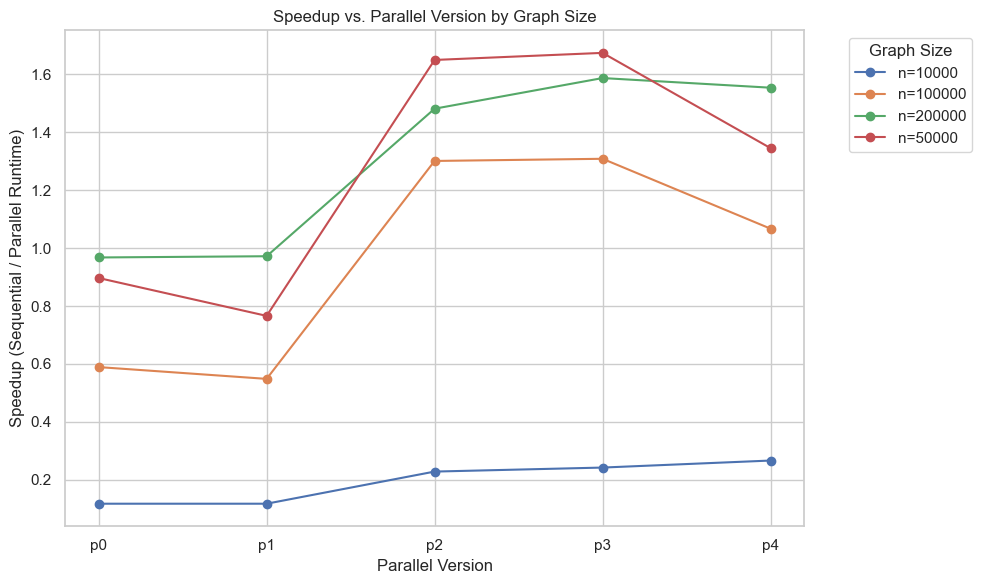

In [22]:
# Plot
plt.figure(figsize=(10, 6))
for graph_size, grp in df_speedup.groupby("Graph Size"):
    plt.plot(grp["Type"], grp["Speedup"], marker='o', label=f"n={graph_size}")

plt.xlabel("Parallel Version")
plt.ylabel("Speedup (Sequential / Parallel Runtime)")
plt.title("Speedup vs. Parallel Version by Graph Size")
plt.xticks([f"p{i}" for i in range(len(par_files))])
plt.legend(title="Graph Size", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()